<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from random import randint
from tensorflow.keras.datasets import mnist

## Question 1

Load the MNIST black-and-white handwritten digits dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Question 2

Show 1 plot for each digit (select randomly)

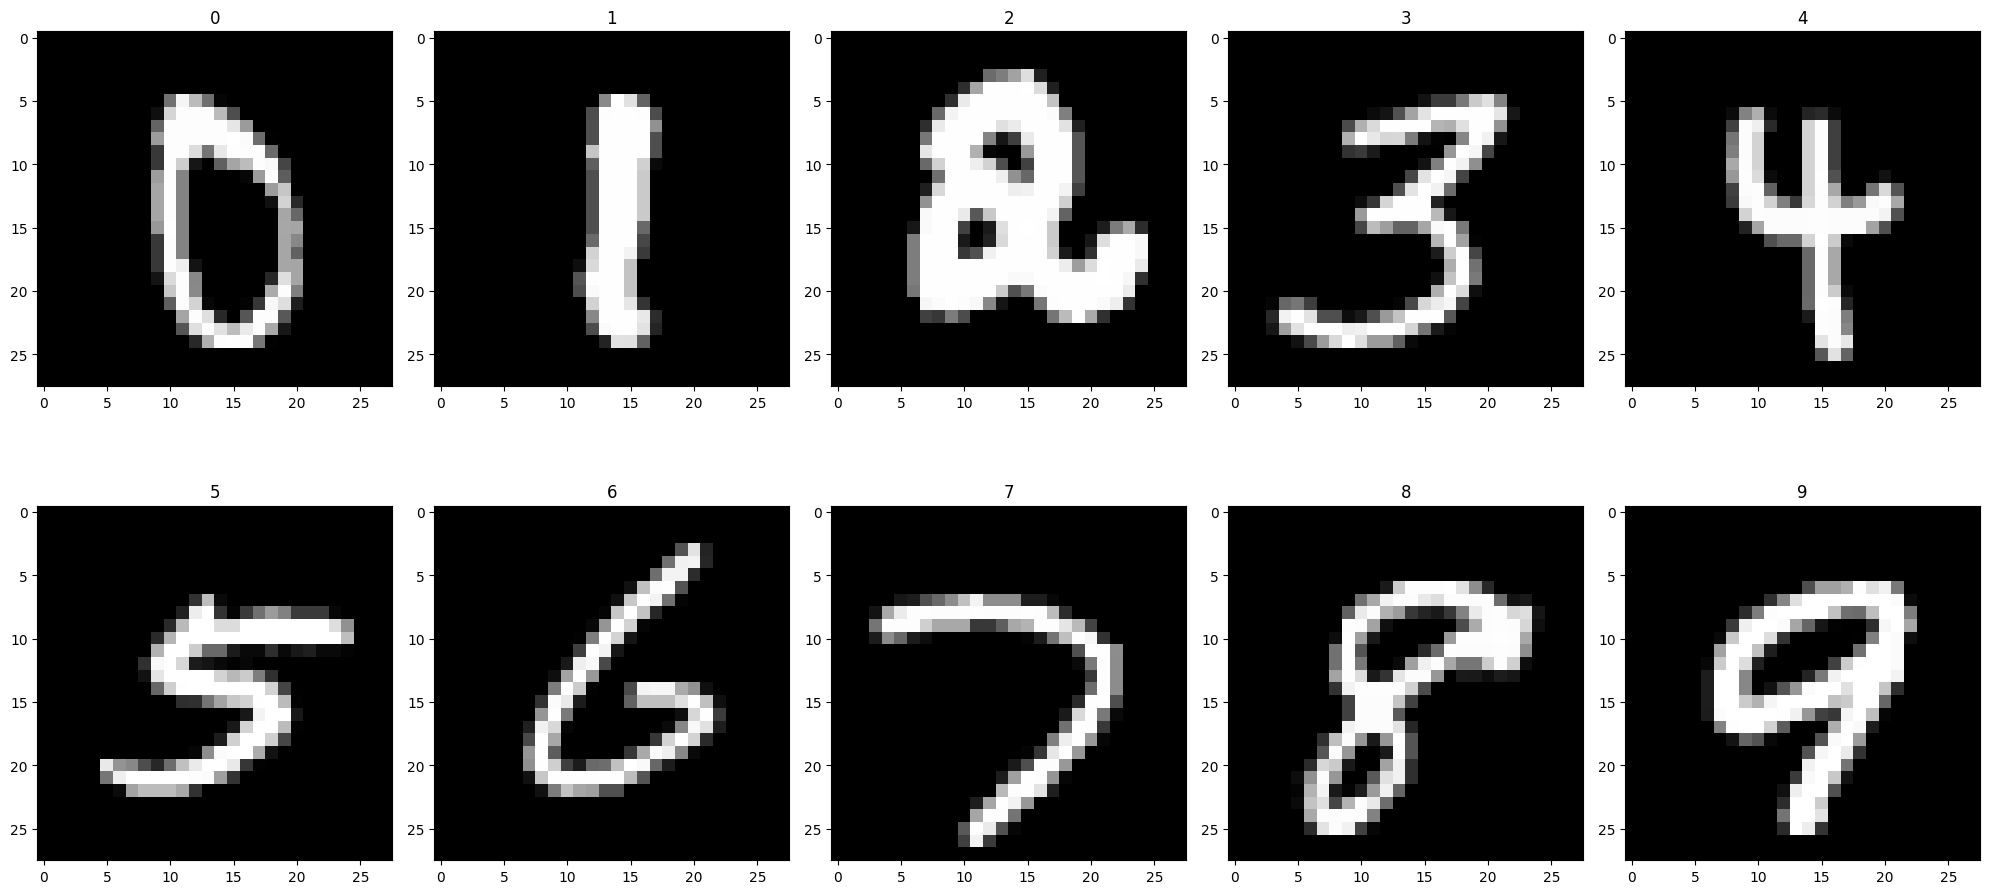

In [3]:
images = []

for i in range(10):
  digit = x_train[y_train == i]
  index = randint(0, len(digit) - 1)
  images.append(digit[index])

figure, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, axis in enumerate(axes.flat):
  axis.imshow(images[i], cmap='gray')
  axis.set_title(i)

plt.tight_layout()
plt.show()


## Question 3

What is the size of each image? Are all the pixels in the image of a digit important? Justify the answer

In [4]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


Each image is sized 28x28

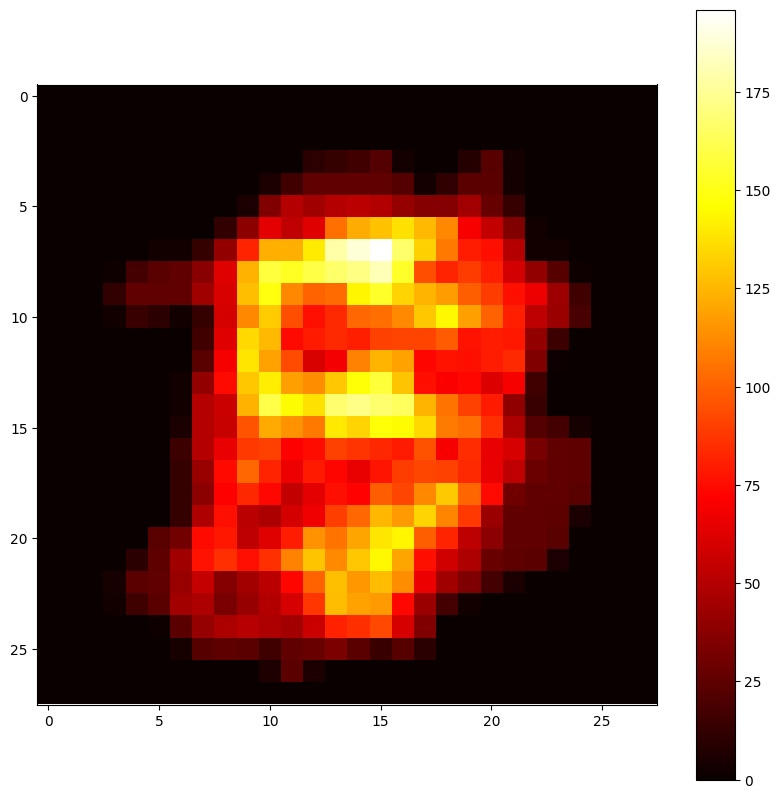

In [5]:
combined_heatmap = np.array(images).mean(axis=0)

plt.figure(figsize=(10, 10))
plt.imshow(combined_heatmap, cmap='hot')
plt.colorbar()
plt.show()

In MNIST each image in x_train is made of pixels (28x28) and each pixel has a value in [0, 255] where 0 means black and 255 means white. While each of the 784 pixels is important, not all pixels carry meaningful information. Black/background pixels are not part of the displayed digit and they are the same across all pictures (e.g. first (top-most left) and last (bottom right) pixel in every picture are exactly the same).

Most important pixels are usually located in the middle of the image where the most white pixels are located. This can be further demonstrated by the heatmap above which shows as brighter the most important on average pixels from the digits displayed earlier, and darker those that do not carry any meaningful information.

## Question 4

Convert x_train, x_test into vectors

In [6]:
x_train_vector = x_train.reshape(x_train.shape[0], -1)
x_test_vector = x_test.reshape(x_test.shape[0], -1)

print("x_train: \n")
print(x_train_vector.shape)

print("x_train first 10 elements")
print(x_train_vector[:10])

print("\nx_test: \n")
print(x_test_vector.shape)
print("\nx_test first 10 elements: ")
print(x_test_vector[:10])


x_train: 

(60000, 784)
x_train first 10 elements
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

x_test: 

(10000, 784)

x_test first 10 elements: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The vectors produced above are essentially 1d arrays with 10 places, since we are representing values between 0-9, 9 of which are 0 and 1 has the value 1 on the position of the actual label number.

## Question 5

Train KNN classifiers for various values of k, using all training samples, and compute the accuracy score on the training and test sets. Create line plot with k on the horizontal axis and accuracy on the vertical

In [7]:
k_array = [5, 15, 51, int(np.sqrt(len(x_train_vector)))]

results = {}

for k in k_array:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_vector, y_train)

  y_train_pred = knn.predict(x_train_vector)
  y_test_pred = knn.predict(x_test_vector)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  results[k] = {
      'train_accuracy': train_accuracy,
      'test_accuracy': test_accuracy,
      'model': knn
  }



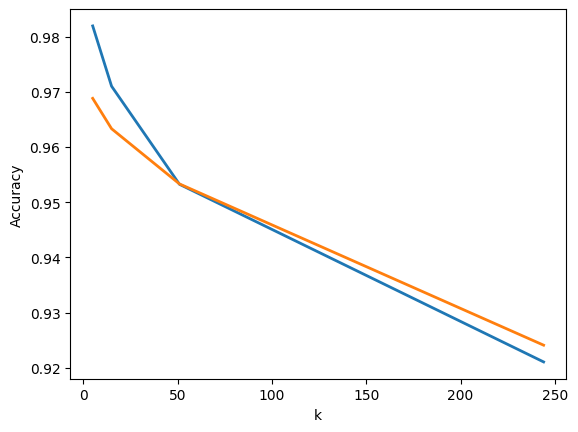

In [8]:
train_accuracy_list = [results[k]['train_accuracy'] for k in k_array]
test_accuracy_list = [results[k]['test_accuracy'] for k in k_array]

plt.plot(k_array, train_accuracy_list, label='Train Accuracy', linewidth=2)
plt.plot(k_array, test_accuracy_list, label='Test Accuracy', linewidth=2)
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.show()

Best K model:

In [9]:
best_k = max(results.keys(), key=lambda k: results[k]['test_accuracy'])

print(f"Best K: {best_k}")
print(f"Train Accuracy: {results[best_k]['train_accuracy']}")
print(f"Test Accuracy: {results[best_k]['test_accuracy']}")

Best K: 5
Train Accuracy: 0.9819166666666667
Test Accuracy: 0.9688


## Question 6

Divide x_train and x_test by 255 so that pixel values are scaled between [0, 1] and repeat question 5. Compare the results.

In [10]:
x_test_normalized = x_test_vector / 255.0
x_train_normalized = x_train_vector / 255.0

results_normalized = {}

for k in k_array:
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  knn.fit(x_train_normalized, y_train)

  y_train_pred = knn.predict(x_train_normalized)
  y_test_pred = knn.predict(x_test_normalized)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  results_normalized[k] = {
      'train_accuracy': train_accuracy,
      'test_accuracy': test_accuracy,
      'model': knn
  }

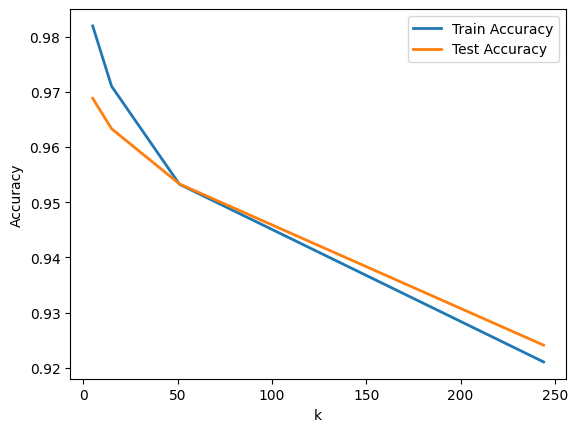

In [11]:
train_accuracy_normalized_list = [results_normalized[k]['train_accuracy'] for k in k_array]
test_accuracy_normalized_list = [results_normalized[k]['test_accuracy'] for k in k_array]

plt.plot(k_array, train_accuracy_normalized_list, label='Train Accuracy', linewidth=2)
plt.plot(k_array, test_accuracy_normalized_list, label='Test Accuracy', linewidth=2)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model comparison:

In [12]:
for k in k_array:
  test_accuracy = results[k]['test_accuracy']
  test_accuracy_scaled = results_normalized[k]['test_accuracy']
  print(f"K: {k}")
  print(f"Test Accuracy (original): {test_accuracy}")
  print(f"Test Accuracy (normalized): {test_accuracy_scaled}")
  print()

K: 5
Test Accuracy (original): 0.9688
Test Accuracy (normalized): 0.9688

K: 15
Test Accuracy (original): 0.9633
Test Accuracy (normalized): 0.9633

K: 51
Test Accuracy (original): 0.9533
Test Accuracy (normalized): 0.9533

K: 244
Test Accuracy (original): 0.9241
Test Accuracy (normalized): 0.9241



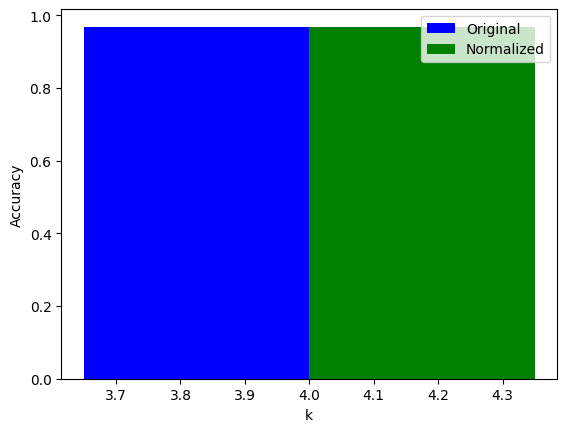

In [13]:
plt.bar(len(k_array) - 0.175, test_accuracy_list, width=0.35, label='Original', color='blue')
plt.bar(len(k_array) + 0.175, test_accuracy_normalized_list, width=0.35, label='Normalized', color='green')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the results above we notice that the accuracy from both original and normalized models are exactly the same between the 2 models. While suspicious at first this actually makes sense.

We are scaling the data by a constant value (255). Because all values are scaled by the same constant, the relative distances remain the same so this means that the neighbours in KNN remain exactly the same!

## Question 7

Use paint to draw a digit of your choice in a 28x28 image. Set the background to black and draw the digit in white. Update the image and convert it to grayscale and check whether the best classifier from question 6 can correctly classify the digit

In [14]:
from PIL import Image

img = Image.open('3.jpg')
img_gray = img.convert('L').resize((28, 28))
img_gray


In [15]:
img_gray_array = np.array(img_gray)
img_gray_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  88, 126,
        122,  80,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 255, 255,
        255, 255, 226, 142,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 115, 255, 255,
        255, 255, 255, 255, 209,  16,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 146, 172,
        185, 241, 255, 255, 255,  75,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  34, 207, 255, 255, 103,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 194, 255, 255, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  33,  51,
         73, 162, 253, 255, 255,  73,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 182, 244, 254,
        255, 255, 255, 255, 194,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 255, 255, 255,
        255, 255, 255, 241,  49,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 218, 255, 255,
        255, 255, 255, 253, 201,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,  91, 155,
        215, 253, 255, 255, 255, 227,  48,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          8,  58, 162, 255, 255, 255, 207,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 112, 251, 255, 255,  74,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 189, 255, 255, 124,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 152, 255, 255, 137,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  42,  19,   3,
          0,   0,   0,   0, 155, 255, 255, 139,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11, 185, 249, 231, 207,
        185, 156, 154, 165, 238, 255, 255, 121,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  37, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 245,  41,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6, 164, 247, 255, 255,
        255, 255, 255, 255, 255, 235,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  37,  66,  91,
        128, 140, 140, 140, 109,  31,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [16]:
model = results[best_k]['model']
pred = model.predict(img_gray_array.reshape(1, -1))
print(f"Predicted digit: {pred[0]}")

Predicted digit: 3


In [17]:
for k in k_array:
  pred = results[k]['model'].predict(img_gray_array.reshape(1, -1))
  print(f"{k}: Predicted digit: {pred[0]}")

5: Predicted digit: 3
15: Predicted digit: 3
51: Predicted digit: 3
244: Predicted digit: 3
